In [19]:
import json

import matplotlib.pyplot as plt
import numpy as np

In [20]:
!ls ../results/*_mlm_*

2024-10-21_02-18-24_mlm_finetuned_model_loss_graph.png
config.json
model.safetensors
trainer_state.json
training_args.bin


In [21]:
model_name = "2024-10-21_02-18-24_mlm_finetuned_model"
model_dir = f"../results/{model_name}"

In [22]:
file_path = f"{model_dir}/trainer_state.json"

with open(file_path, "r") as f:
    trainer_state = json.load(f)

In [23]:
def moving_average(data, window_size=3):
    return np.convolve(data, np.ones(window_size) / window_size, mode="valid")

In [24]:
plt.rcParams.update(
    {
        "font.size": 12,
        "font.family": "serif",
        "font.serif": ["Times New Roman"],
    }
)

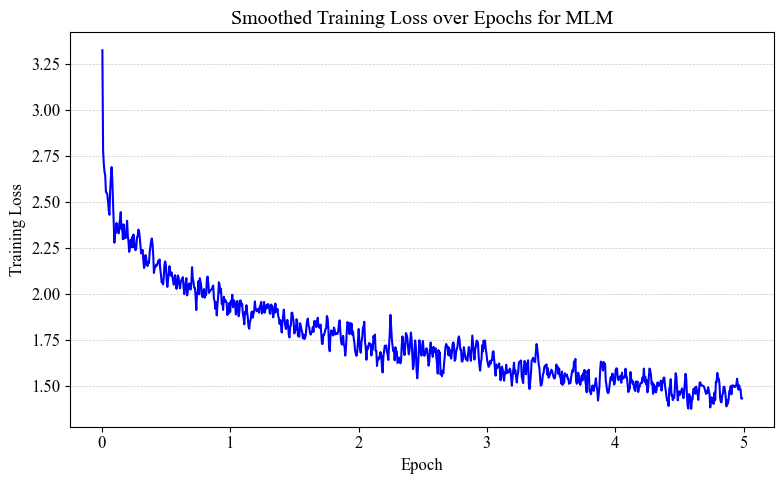

In [25]:
epochs = []
losses = []

for entry in trainer_state["log_history"]:
    if "epoch" in entry and "loss" in entry:
        epochs.append(entry["epoch"])
        losses.append(entry["loss"])

smoothed_losses = moving_average(losses, window_size=3)

smoothed_epochs = epochs[: len(smoothed_losses)]

plt.figure(figsize=(8, 5))
plt.plot(smoothed_epochs, smoothed_losses, linestyle="-", color="b")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Smoothed Training Loss over Epochs for MLM")

plt.grid(visible=True, axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

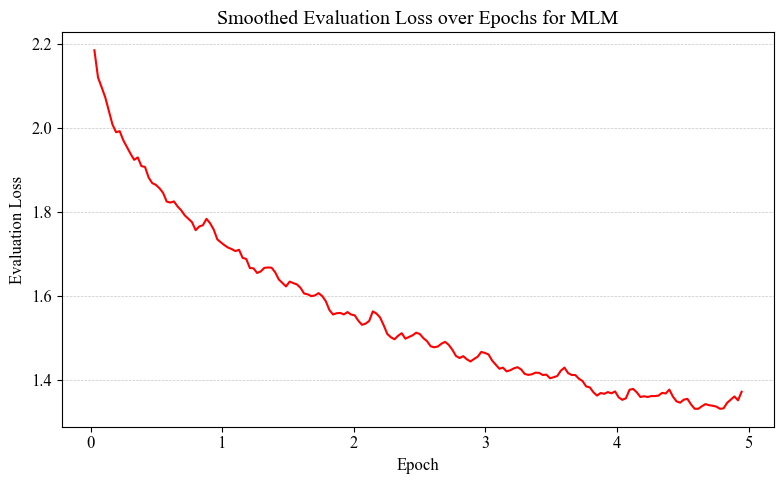

In [26]:
epochs = []
losses = []

for entry in trainer_state["log_history"]:
    if "epoch" in entry and "eval_loss" in entry:
        epochs.append(entry["epoch"])
        losses.append(entry["eval_loss"])

smoothed_losses = moving_average(losses, window_size=3)

smoothed_epochs = epochs[: len(smoothed_losses)]

plt.figure(figsize=(8, 5))
plt.plot(smoothed_epochs, smoothed_losses, linestyle="-", color="r")
plt.xlabel("Epoch")
plt.ylabel("Evaluation Loss")
plt.title("Smoothed Evaluation Loss over Epochs for MLM")

plt.grid(visible=True, axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

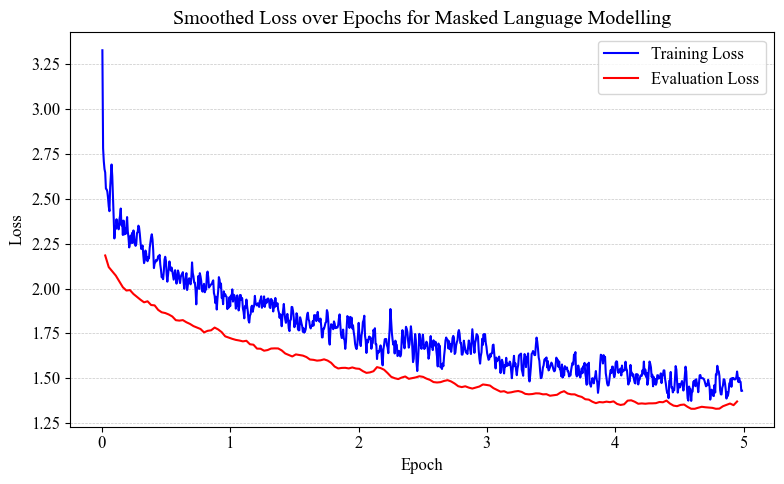

In [27]:
epochs_train = []
epochs_eval = []
train_losses = []
eval_losses = []

for entry in trainer_state["log_history"]:
    if "epoch" in entry:
        if "loss" in entry:
            epochs_train.append(entry["epoch"])
            train_losses.append(entry["loss"])
        if "eval_loss" in entry:
            epochs_eval.append(entry["epoch"])
            eval_losses.append(entry["eval_loss"])

smoothed_train_losses = moving_average(train_losses, window_size=3)
smoothed_eval_losses = moving_average(eval_losses, window_size=3)

smoothed_epochs_train = epochs_train[: len(smoothed_train_losses)]
smoothed_epochs_eval = epochs_eval[: len(smoothed_eval_losses)]

plt.figure(figsize=(8, 5))

plt.plot(
    smoothed_epochs_train,
    smoothed_train_losses,
    label="Training Loss",
    linestyle="-",
    color="b",
)
plt.plot(
    smoothed_epochs_eval,
    smoothed_eval_losses,
    label="Evaluation Loss",
    linestyle="-",
    color="r",
)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Smoothed Loss over Epochs for Masked Language Modelling")

plt.grid(visible=True, axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

plt.legend()

plt.tight_layout()
plt.savefig(f"{model_dir}/{model_name}_loss_graph.png")
plt.show()